# ConnectTel Customer Churn Prediction
by Kuro Doumu

## Project Overview
### 1. Introduction
- Problem Statement
- Project Objective
- Project Goals
### 2. Data Collection
- Reading Data
- Exploring Data
- Data Format/Structure
- Data Cleaning
### 3. Exploratory Data Analysis
- Data Visualization
    - identifying key trends, patterns and relationships in the data
    - Identify outliers, anomalies and correlation
### 4. Feature Engineering
- Create and/or transform features to improve modelperformance
- Encode categorical features
- Scale or Normalize numerical features
### 5. Model Selection
- Choose appropriate ML algorithms 
- Split the data into training and testing
- Cross Validation and hyperparameters tuning
### 6. Model Training and Evaluation
- Train Model using training data
- Evaluate Model performance using appropriate metrics
- Compare different models and select best performing one
### 7. Conclusion
- Summarize key findings and insights from project
- Limitations or challenges encountered during the project
- Areas of imporivement and further research 

### 1. Introduction

**Problem Statement** <br>
ConnectTel Telecom Company faces the pressing need to address
customer churn, which poses a significant threat to its business
sustainability and growth.
The company's current customer retention strategies lack precision and
effectiveness, resulting in the loss of valuable customers to competitors.

**Problem Objective** <br>
To overcome this challenge, ConnectTel aims to develop a
robust customer churn prediction system for which you have been contacted
to handle as a Data Scientist. By leveraging advanced analytics and machine
learning techniques on available customer data, the company seeks to
accurately forecast customer churn and implement targeted retention
initiatives.

**Project Goals** <br>
This proactive approach will enable ConnectTel to reduce customer
attrition, enhance customer loyalty, and maintain a competitive edge in the
highly dynamic and competitive telecommunications industry

### 2. Data Collection

In [1]:
# import PrettyTable

In [2]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.metrics import confusion_matrix,f1_score, accuracy_score, precision_score, recall_score, auc, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from prettytable import PrettyTable

In [3]:
# Reading csv into pandas df
df = pd.read_csv('Customer-Churn.csv')

In [4]:
# making a copy of our df
df_copy = df.copy()

In [5]:
# exploring first 5 rolls of our df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Converting churn column to 1 and 0. 0 = "No" 1 = "Yes"
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [7]:
# Gettin info of our df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**TotalCharges** is in the wrong Dtype

In [8]:
# Dropping customerID column
df.drop(columns='customerID', axis=1, inplace=True)

In [9]:
# df = df_copy

In [10]:
df['TotalCharges'][df['TotalCharges']==' ']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

The columns are showing as a blank space

In [11]:
# Replacing the blanks with Nan then converting Column from object to float dtype format
df['TotalCharges'] = df['TotalCharges'].str.replace(' ','Nan').astype('float')

In [12]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [13]:
# Looking for  Nan values
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# Filling Nana Values in TotalCharges with value from MonthlyCharge
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

In [15]:
df[['MonthlyCharges', 'TotalCharges']].values[3331]

array([19.85, 19.85])

In [16]:
# Number and rolls and columns
df.shape

(7043, 20)

In [17]:
df.duplicated().sum()

22

In [18]:
# df.isna().sum().sort_values(ascending=False).head(2)

In [19]:
# df.dropna(inplace=True)

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992,0.265370
std,0.368612,24.559481,30.090047,2266.730170,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [21]:
df.describe(include=('object'))

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [22]:
# df[['MonthlyCharges', 'TotalCharges']].corr()

### Exploratory Data Analysis

#### Data Visualization

##### Univariate Analysis

In [23]:
# Target Variable
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

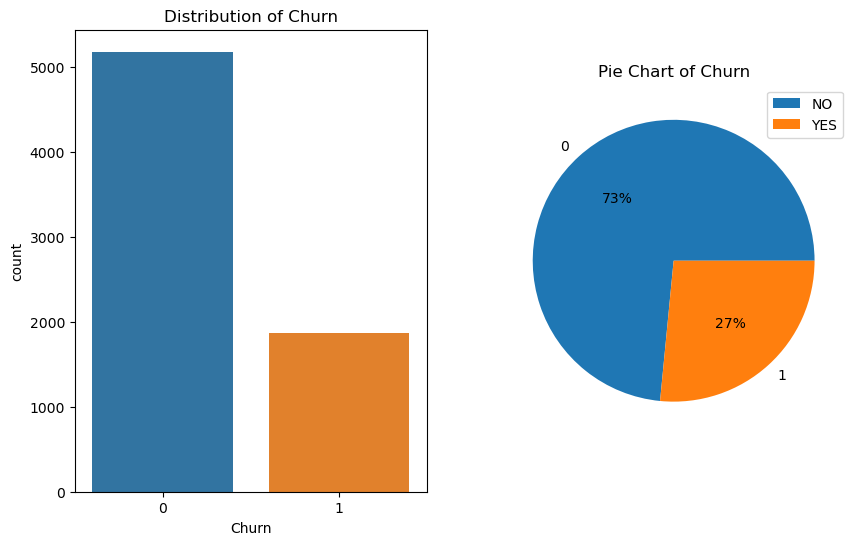

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.countplot(x=df['Churn'], ax=ax[0])
ax[0].set_title('Distribution of Churn')
ax[1].pie(df['Churn'].value_counts(), autopct="%.0f%%",labels=df['Churn'].value_counts().index)
ax[1].set_title('Pie Chart of Churn')
ax[1].legend(['NO', "YES"]);

**Insights:** <br>
**73%** of customers were retained, meaning there is a **27%** Attrtion rate of customers.

In [25]:
# Other foeatures
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

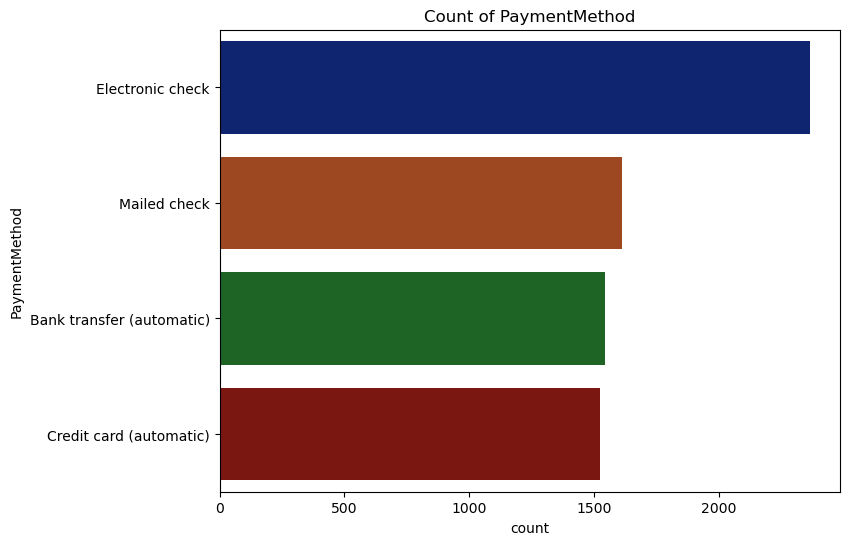

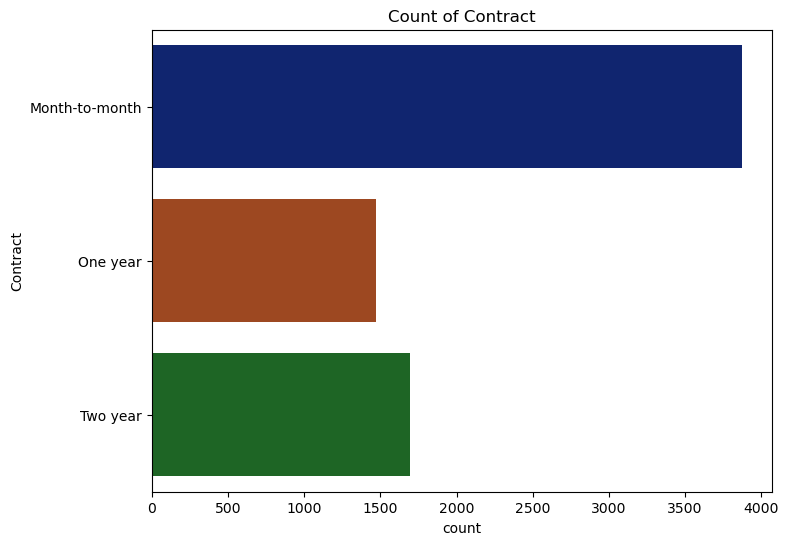

In [26]:
#gender #TotalCharges #PaymentMethod #tenure #Contract
for x in ['PaymentMethod', 'Contract']:
    plt.figure(figsize=(8,6))
    sns.countplot(y=df[x], palette='dark')
    plt.title(f'Count of {x}');

**Insights:**
##### Payment Mothod 
Electronic Check have by far the most customers with 2365, whilst the rest are close with Mailed Checks at 1612, and the two automatic payment methods bank transfer and credit card are the least with 1544 and 1522 respectively.

##### Contract
Month to Month contracts are the most common with 3875, while 2 year has 1695 and 1 year is the least  common at 1473

In [27]:
# df['gender']

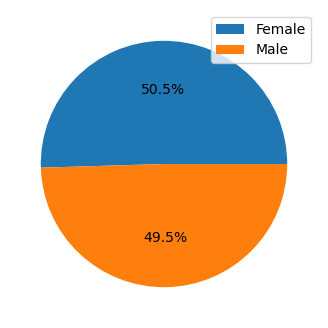

In [28]:
# Gender
plt.figure(figsize=(4,4))
plt.pie(df_copy['gender'].value_counts(),autopct="%1.1f%%",)
plt.legend(df_copy['gender'].unique());

**Insights:** Females are slightly more than male, but this is negligible.

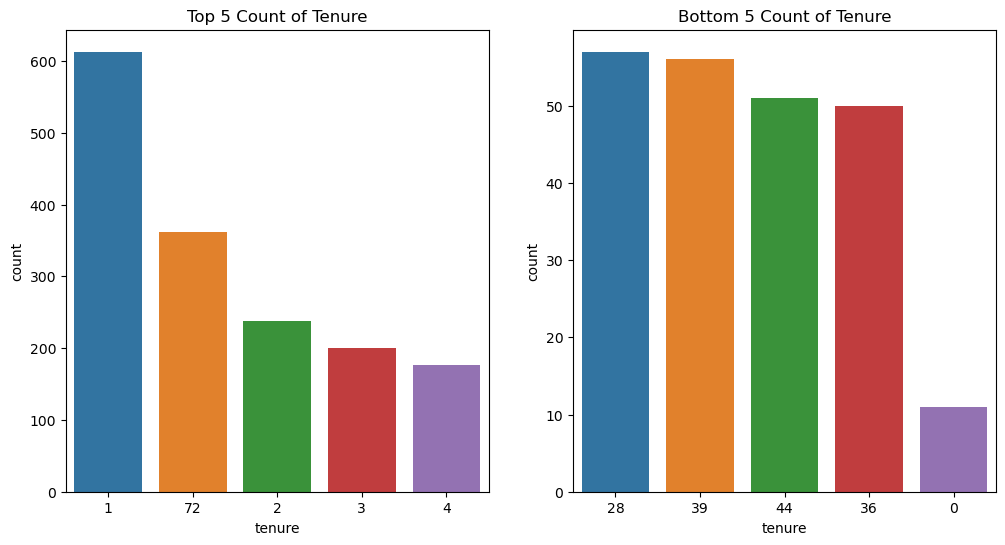

In [29]:
order1 = df['tenure'].value_counts().head(5).index
order2 = df['tenure'].value_counts().tail(5).index
figure, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df['tenure'], order=order1, ax=ax[0])
ax[0].set_title('Top 5 Count of Tenure')
sns.countplot(x=df['tenure'], order=order2, ax=ax[1])
ax[1].set_title('Bottom 5 Count of Tenure');

**Insights:** 
##### Tenure
1 has the highest with 613, then 72 which is the maximun tenure has the 2nd most with 362, then 2,3and 4 round up the top 5, the number with the lowest is 0with just 11, then 36 is next with 50. The average tenure is 32 (median = 29).

In [30]:
# plt.figure(figsize=(15,15))
# df['tenure'].value_counts()

**Insights:** Average tenure is 32

In [31]:
df.tenure

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

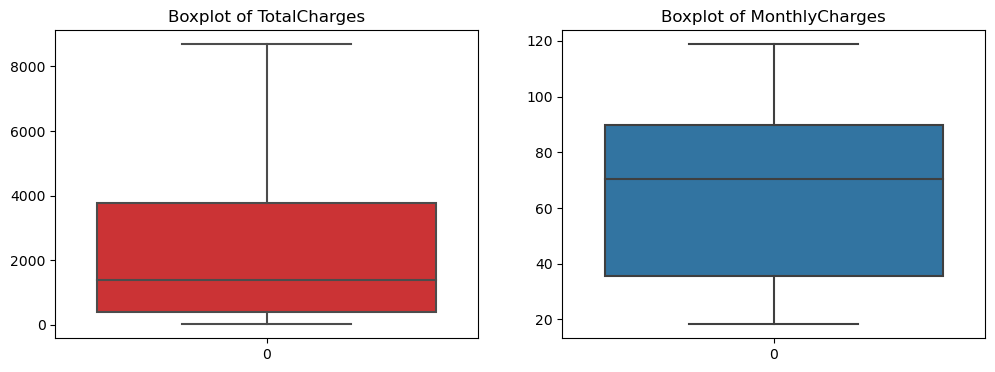

In [32]:
# Total Charges
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(df['TotalCharges'], ax=ax[0], palette='Set1')
ax[0].set_title('Boxplot of TotalCharges')
sns.boxplot(df['MonthlyCharges'], ax=ax[1])
ax[1].set_title('Boxplot of MonthlyCharges');

**Insights:**

##### TotalCharges
The majority of TotalCharges is between 200 - 4000, the average is 2,280 (median=1,395), min is 19 while the max is 8,685
##### MonthlyCharges
The majority of MonthlyCharges is between 35 - 85, the average is 65 (median=70), min is 18 while the max is 119.

In [33]:
# df['MonthlyCharges'].median()

2280 #average totalcharges

##### Bivariate Analysis (Categorical Variables)

In [34]:
# df.columns

In [35]:
# df['SeniorCitizen'].loc[df['Churn']=='Yes'].value_counts()/df['SeniorCitizen']

In [36]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

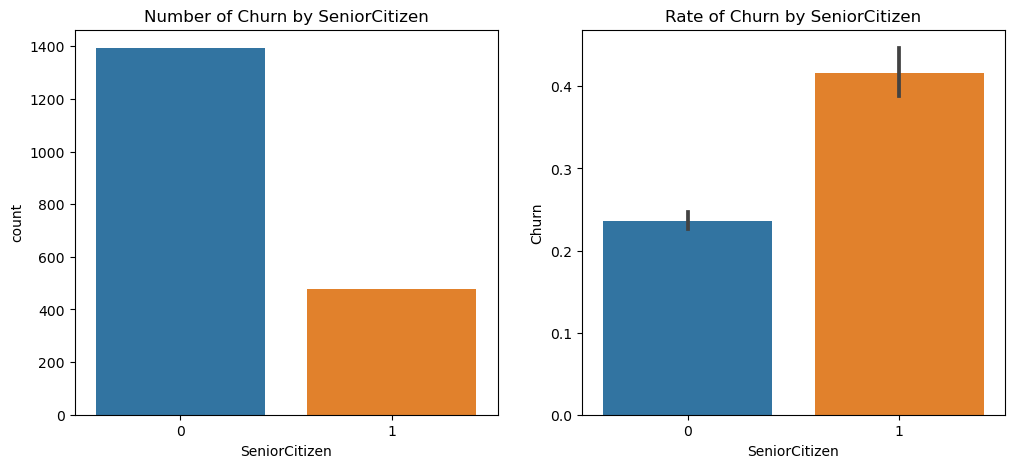

In [37]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=df['SeniorCitizen'].loc[df['Churn']==1], ax=ax[0])
ax[0].set_title('Number of Churn by SeniorCitizen')
sns.barplot(data=df, x='SeniorCitizen', y='Churn', ax=ax[1])
ax[1].set_title('Rate of Churn by SeniorCitizen');

**Insights:** 
##### SeniorCitizen
Non-Seniors have a 24% churn rate, whilst SeniorCitizens have 42% rate. 

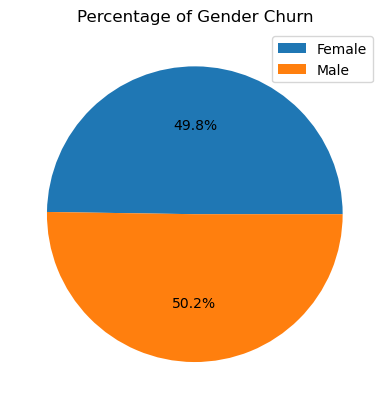

In [38]:
male = df.loc[df['gender'] == 'Male'].loc[df['Churn']==1].count()[0]
female = df[df['gender'] == 'Female'].loc[df['Churn']==1].count()[0]
plt.pie((male, female), autopct="%.1f%%")
plt.legend(df['gender'])
plt.title('Percentage of Gender Churn');

**Insights:** There is just a 0.4% difference between females who churn and males who churn. Females 49.8 | Males 50.2

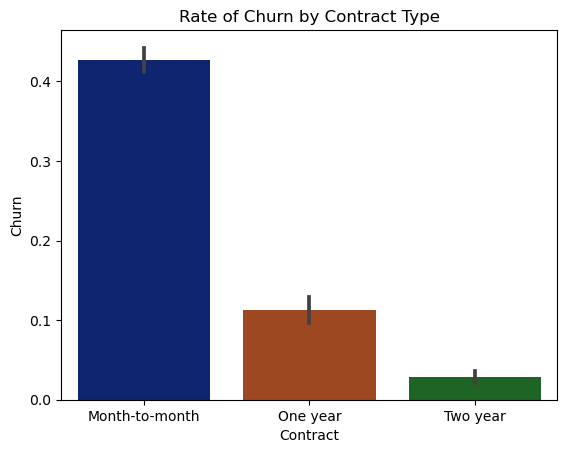

In [39]:
sns.barplot(data=df, x='Contract', y='Churn',palette='dark')
plt.title('Rate of Churn by Contract Type');

**Insights:**
##### Contract
- Month-to-Month contracts have the highest rate of churn at 43%
- One-year contracts had 10%
- Whilst 2-year contracts had the lowest with under 5%
- The longer your contract the more less likely to churn the customer is

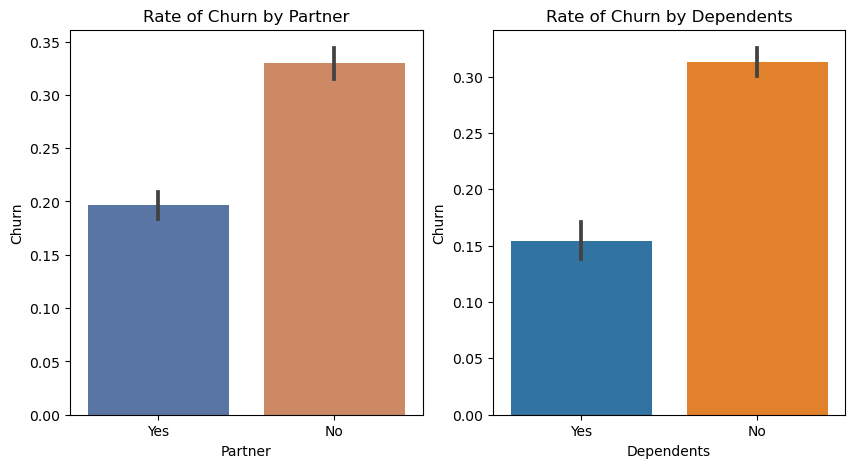

In [40]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.barplot(data=df, x='Partner',y='Churn', ax=ax[0], palette='deep')
ax[0].set_title('Rate of Churn by Partner')
sns.barplot(data=df, x='Dependents',y='Churn', ax=ax[1], order=df['Partner'].unique())
ax[1].set_title('Rate of Churn by Dependents');

**insights:**
##### Partner & Dependent
- Customers without Partner and Dependent churn significantly more than those with a partner or dependent
- Churn rate with partner 33% and without is 19%
- Churn rate with dependent 31% and without is 16%

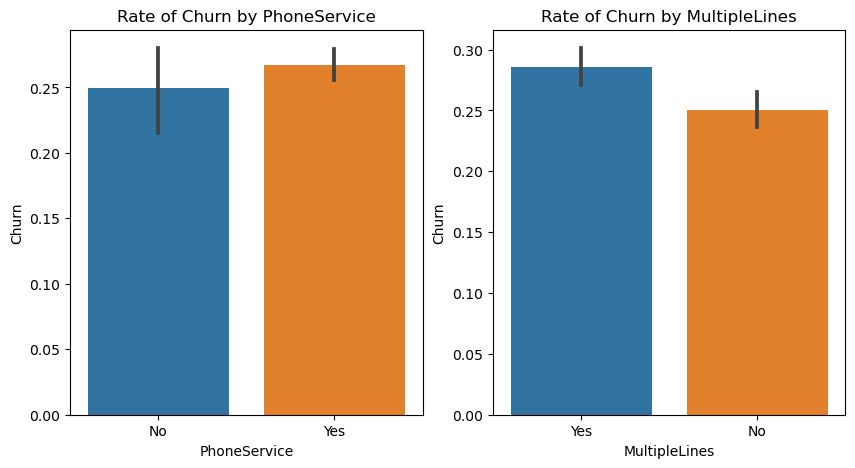

In [41]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.barplot(data=df, x='PhoneService',y='Churn', ax=ax[0])
ax[0].set_title('Rate of Churn by PhoneService')
sns.barplot(data=df, x='MultipleLines',y='Churn', ax=ax[1], order=df['Partner'].unique())
ax[1].set_title('Rate of Churn by MultipleLines');

**Insights:**
##### PhoneService and MultipleLines
- Customers with phone service have slightly higher churn rate at 26% conpared to 24% of those without PhoneService.
##### MultipleLines
- Similar to PhoneService, very little difference
- Customers with MultipleLines are at 26% rate, while those without are 24%

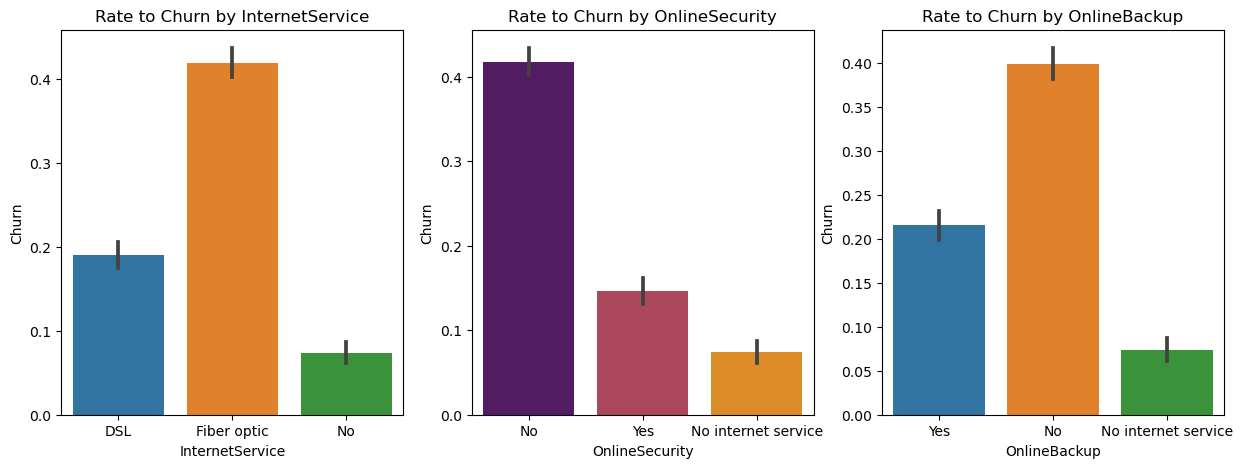

In [42]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=df, x='InternetService',y='Churn', ax=ax[0])
ax[0].set_title('Rate to Churn by InternetService')
sns.barplot(data=df, x='OnlineSecurity',y='Churn', ax=ax[1],palette='inferno')
ax[1].set_title('Rate to Churn by OnlineSecurity')
sns.barplot(data=df, x='OnlineBackup',y='Churn', ax=ax[2],)
ax[2].set_title('Rate to Churn by OnlineBackup');

**insights:**
##### InternetService
- Fiber Optic have the highest churn rate 41%
- DSL have a 15% rate
- Fiber Optic customers churn significantly more than DSL despite Fiber Optic being the better product, this could signify disatisfaction with the service for one reason.
- Fiber Optic customers could also be more technology savvy and are churning to find better products else where

##### OnlineSecurity
- Unsuprisingly customers without and OnlineSecurity package have the higher churn rate compared to those with one, 41% and 14% respectively.
- Many customers without an OnlineSecurity package are short term contract customers who have little commitment to Connectel

#### OnlineBackup
- Similar story to OnlineSecurity
- Those without have a 38% rate, those with have a 21% churn rate

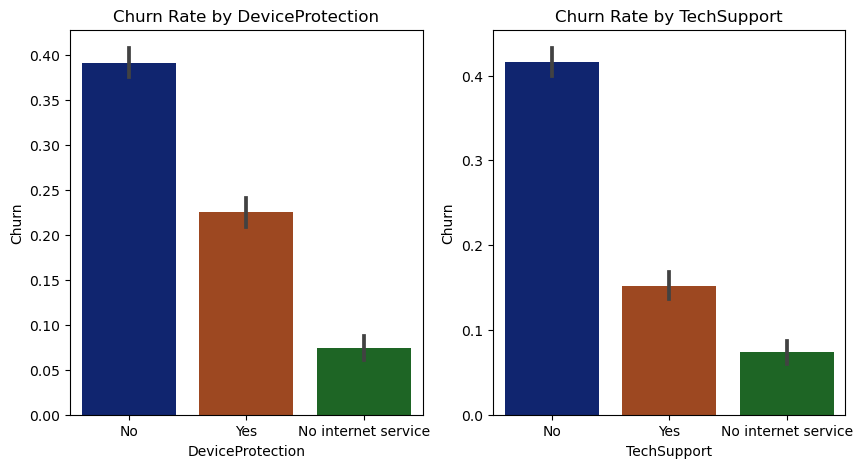

In [43]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.barplot(data=df, x='DeviceProtection',y='Churn', ax=ax[0],palette='dark')
ax[0].set_title('Churn Rate by DeviceProtection')
sns.barplot(data=df, x='TechSupport',y='Churn', ax=ax[1],palette='dark')
ax[1].set_title('Churn Rate by TechSupport');

**Insights:**
##### DeviceProtection
- Customers without a device protection have a churn rate of about 22%
- Customers without one have a rate of 39%

##### TechSupport
- Customers with a TechSupport have a rate of over 15%
- Customers without one are at 41%

Customers are willing to remin at ConnecTel when they are more invested in the various products

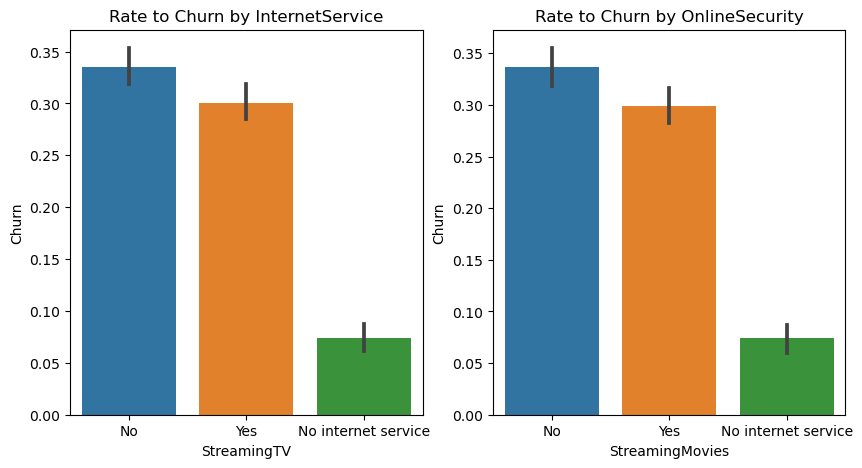

In [44]:
# Streaming
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.barplot(data=df, x='StreamingTV',y='Churn', ax=ax[0])
ax[0].set_title('Rate to Churn by InternetService')
sns.barplot(data=df, x='StreamingMovies',y='Churn', ax=ax[1],)
ax[1].set_title('Rate to Churn by OnlineSecurity');

**Insights:**
- The results are straight forward
- Customers who stream have a rate of 29%
- Those who do not stream have a rate of just under 34%
- The difference is not much but shows suggests that customers might be disatisfied with the streaming provided by ConnecTel

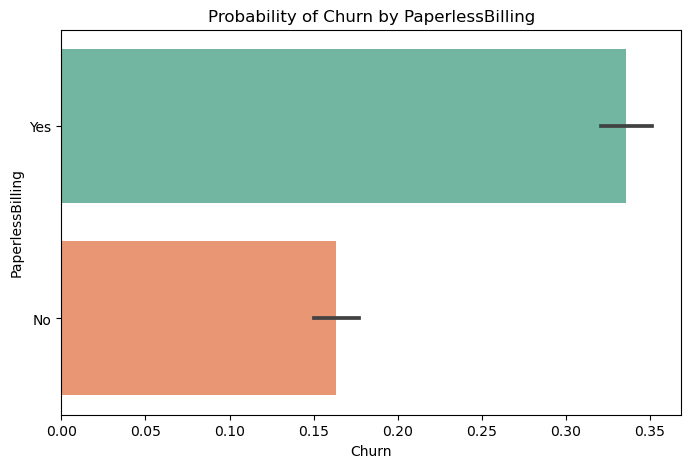

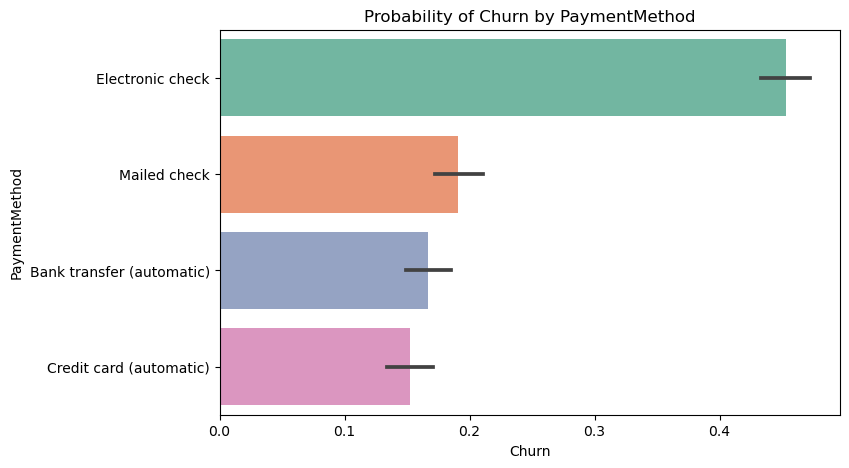

In [45]:
for x in ['PaperlessBilling', 'PaymentMethod']:
    plt.figure(figsize=(8,5))
    sns.barplot(data=df, y=x, x='Churn', palette='Set2')
    plt.title(f'Probability of Churn by {x}');

**Insights**:
##### Paperless Billing
- 34% churn rate for customers who use paperless billing
- 16% rate for those who do not use
##### PaymentMethod
- About a 45% churn rate for Electronic Check customers
- This is more than double the rate compared to the others
- Mailed Check-19%, Bank Transfer-17% and Credit-Card-15%
- The transactions with the automatic payments have the lowest rates
- Electronic Check having the highest rates could suggest the numerous steps in sending e-checks are tiring for the customers.

         Contract       OnlineSecurity  gender
0  Month-to-month                   No    2631
1  Month-to-month  No internet service     524
2  Month-to-month                  Yes     720
3        One year                   No     557
4        One year  No internet service     364
5        One year                  Yes     552
6        Two year                   No     310
7        Two year  No internet service     638
8        Two year                  Yes     747


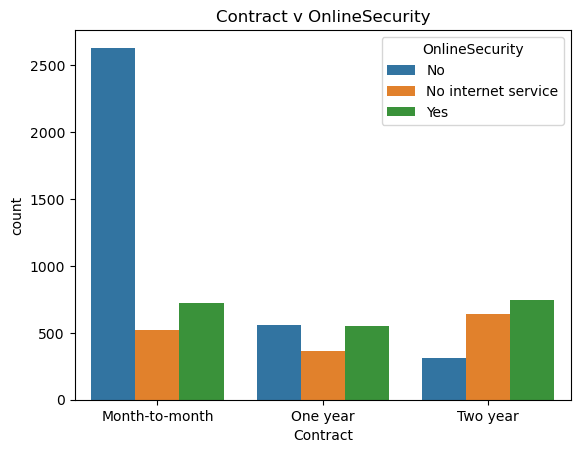

In [46]:
a = df.groupby(['Contract', 'OnlineSecurity']).count()['gender'].reset_index()
print(a)
sns.barplot(data=a, x='Contract', y='gender', hue='OnlineSecurity')
plt.ylabel('count')
plt.title('Contract v OnlineSecurity');

**Insights:**
##### OnlineSecurity vs Contract Type
- Two year contract type has the most customers who have OnlineSecurity
- Month-to-month customers have the most customers without OnlineSecurity
- Also, 2-year contract has the most customers who have no internet access

- The longer the contract,the more likely the customers are going to commit to feature, there reducing their likelyhood of churning
- The vast Month-to-month customers do not have OnlineSecurity, the lack of commitment makes them more suspectible to churning
- Two-year contracts users have the most customers who have no internet service, this could suggest that they have dormant customers

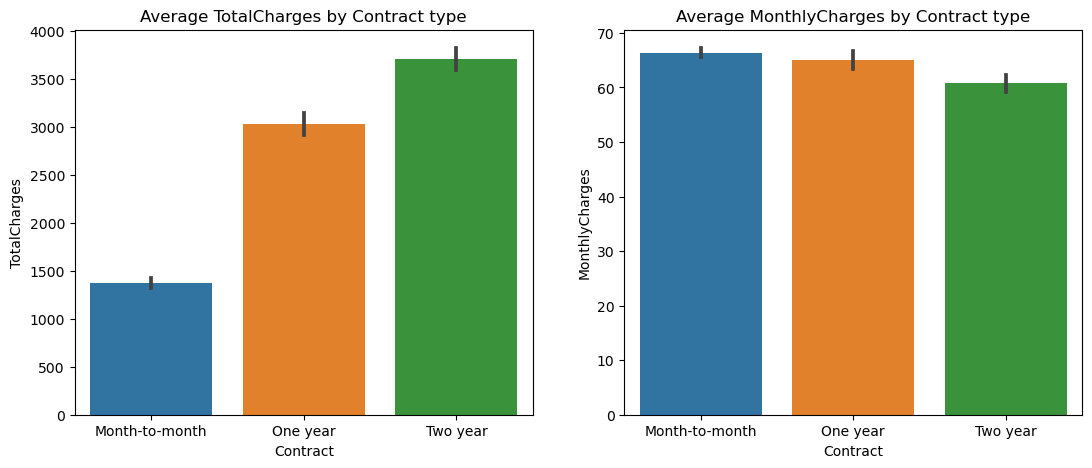

In [47]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.barplot(data=df, x='Contract', y='TotalCharges', ax=ax[0])
ax[0].set_title('Average TotalCharges by Contract type')
sns.barplot(data=df, x='Contract', y='MonthlyCharges', ax=ax[1])
ax[1].set_title('Average MonthlyCharges by Contract type');

**Insights:**
Charges v Contract
- The longer the contract, the higher the TotalCharges
- The shorter the contract type, the higher the MonthlyCharges

##### Bivariate Analysis (Numerical Variables)

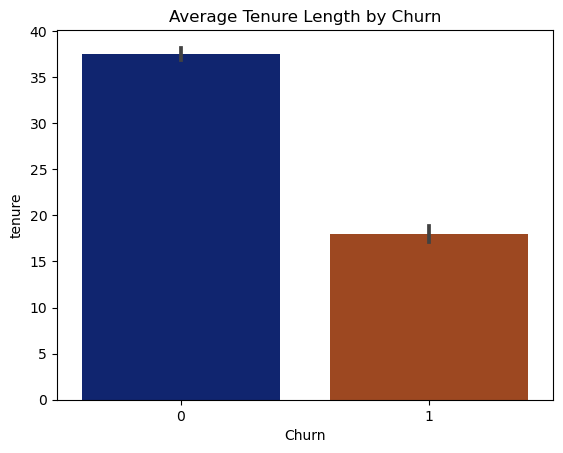

In [48]:
# fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(data=df, x='Churn', y='tenure', palette='dark')
plt.title('Average Tenure Length by Churn');

**Insights:**
##### Tenure
- The longer the tenure of a customer the more likely he remains as a customer
- Longer contracts whould increase the tenure and likelyhood a retaining a customer

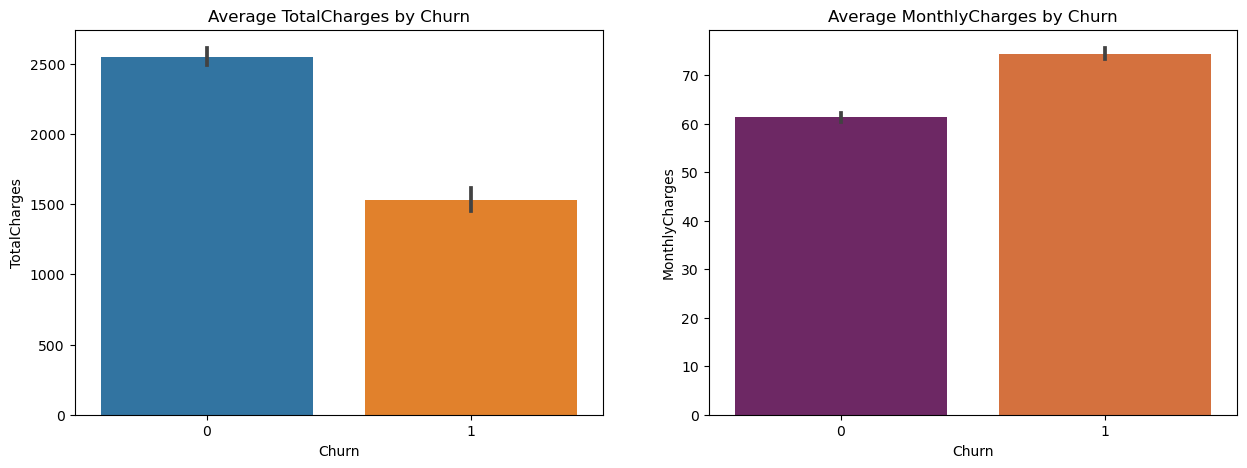

In [49]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(data=df, x='Churn', y='TotalCharges', ax=ax[0])
ax[0].set_title('Average TotalCharges by Churn')
sns.barplot(data=df, x='Churn', y='MonthlyCharges', ax=ax[1], palette='inferno')
ax[1].set_title('Average MonthlyCharges by Churn');

**Insights:** 
##### TotalCharges
- Customers with a higher average TotalCharges churn signifcantly less likely.
- This is due to the fact that longer contracts are going to incure more charges over time

##### MonthlyCharges
- Here, customers with more charges churn more than
- The reason would be because month-to-month contracts have the highest churn rate amongst contract types, therefore their monthlycharges would be more than

**Insights:** 

##### MultiVariate Analysis

In [50]:
#Churn #tenure #TotalCharges
#Contract #PaymentMethod #Churn
#gender #Dependents #Partner

In [51]:
# m = df.groupby(['Churn', 'tenure'])['TotalCharges'].mean().reset_index().melt()
# m.head(1)

In [52]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

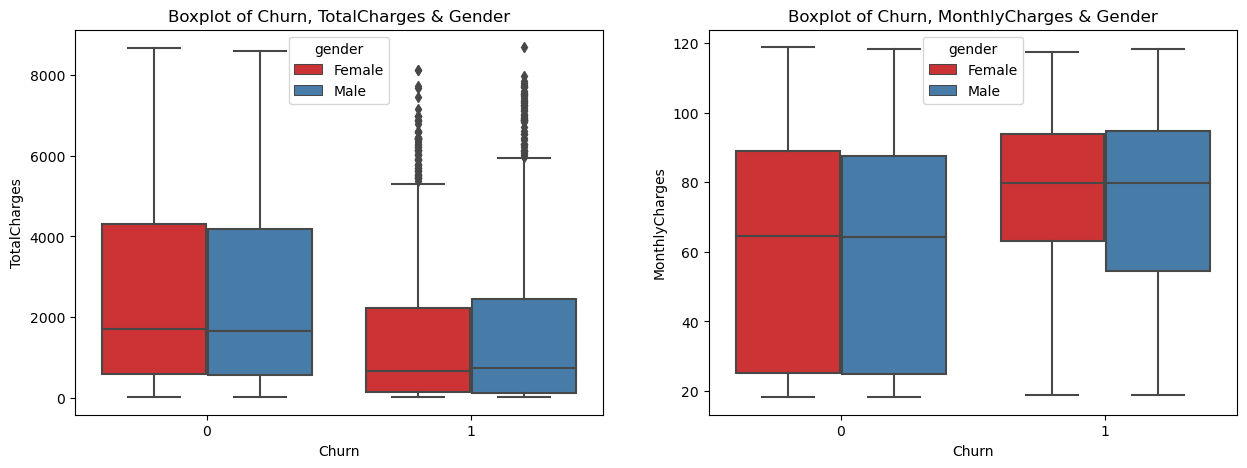

In [53]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=df, x='Churn', y='TotalCharges', hue='gender', ax=ax[0],palette='Set1')
ax[0].set_title('Boxplot of Churn, TotalCharges & Gender')
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='gender', ax=ax[1],palette='Set1')
ax[1].set_title('Boxplot of Churn, MonthlyCharges & Gender');

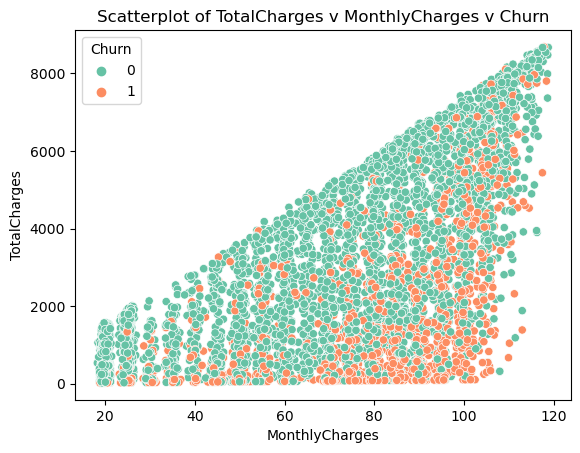

In [54]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='Set2')
plt.title('Scatterplot of TotalCharges v MonthlyCharges v Churn');

**Insights:**
- As demonstrated in the scatterplot most customers who have low TotalCharges and high MonthlyCharges are those churning, mainly because of the Month-to-Month COntract

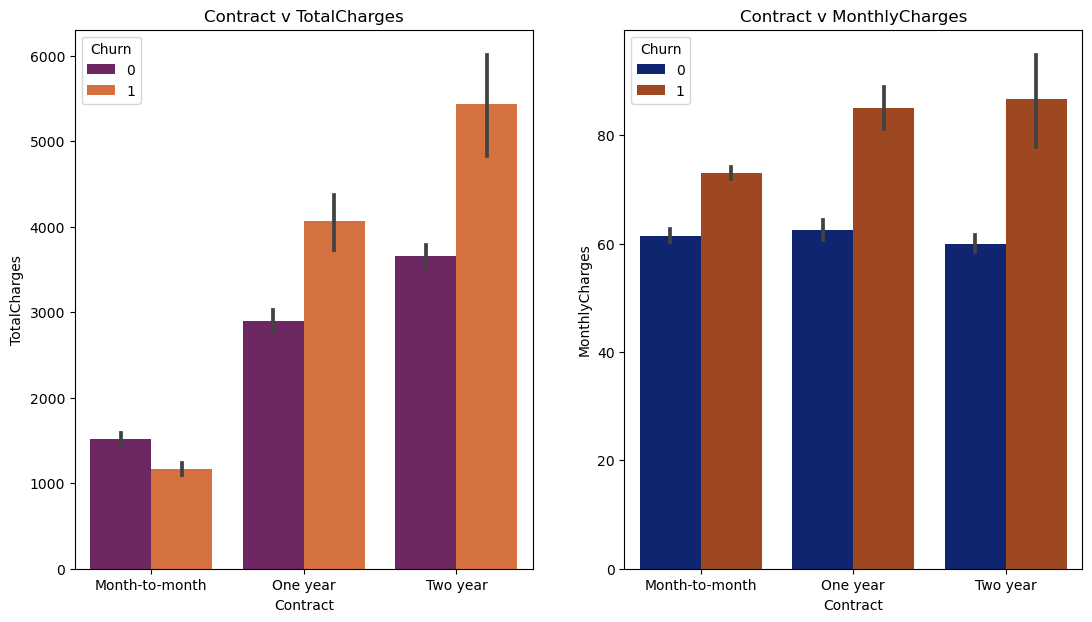

In [55]:
fig, ax = plt.subplots(1,2, figsize=(13,7))
sns.barplot(data=df, x='Contract', y='TotalCharges', hue='Churn', ax=ax[0], palette='inferno')
ax[0].set_title('Contract v TotalCharges')
sns.barplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn', ax=ax[1], palette='dark')
ax[1].set_title('Contract v MonthlyCharges');

### 4. Feature Engineering 

In [56]:
# df.columns

##### Feature Engineering

In [57]:
# joing #StremingTV and StreamingMovies into df['Streaming']
stream = []
for index, row in df.iterrows():
    if row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes':
        stream.append(1)
    else:
        stream.append(0)
pd.Series(stream)
df['streaming'] = stream

In [58]:
# df[['streaming', 'StreamingTV', 'StreamingMovies']].sample(10)

In [59]:
df[['Partner', 'Dependents']].value_counts()

Partner  Dependents
No       No            3280
Yes      Yes           1749
         No            1653
No       Yes            361
Name: count, dtype: int64

In [60]:
family = []
for index, row in df.iterrows():
    if row['Partner'] == 'Yes' or row['Dependents'] == 'Yes':
        family.append(1)
    else:
        family.append(0)
pd.Series(family)
df['family'] = family

In [61]:
#dropping columns
df.drop(columns=['StreamingMovies', 'StreamingTV', 'Partner','Dependents'], inplace=True)

In [62]:
df1 = df.copy()

##### Data Pre-processing

Scaling

In [63]:
# Scale MonthlyCharges TotalCharges and tenure
scale = MinMaxScaler()
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[columns] = scale.fit_transform(df[columns])
df.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,streaming,family
0,Female,0,0.013889,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,0,0,1
1,Male,0,0.472222,Yes,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,0.385075,0.215867,0,0,0
2,Male,0,0.027778,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,1,0,0
3,Male,0,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),0.239303,0.210241,0,0,0
4,Female,0,0.027778,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,1,0,0


Encoding

In [64]:
encoder = LabelEncoder()
categorical = df1.select_dtypes('object')
for col in categorical:
    df[col] = encoder.fit_transform(df[col])

In [65]:
df.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,streaming,family
0,0,0,0.013889,0,1,0,0,2,0,0,0,1,2,0.115423,0.001275,0,0,1
1,1,0,0.472222,1,0,0,2,0,2,0,1,0,3,0.385075,0.215867,0,0,0
2,1,0,0.027778,1,0,0,2,2,0,0,0,1,3,0.354229,0.010310,1,0,0
3,1,0,0.625000,0,1,0,2,0,2,2,1,0,0,0.239303,0.210241,0,0,0
4,0,0,0.027778,1,0,1,0,0,0,0,0,1,2,0.521891,0.015330,1,0,0


#### 5. Model Selection, Training and Validation

##### Model Selection

In [66]:
models = [RandomForestClassifier, GaussianNB, DecisionTreeClassifier, SVC, LogisticRegression, DecisionTreeClassifier]

In [67]:
# Spliting data to independent and target variables
X = df.drop('Churn', axis=1) # Independent Variable
y = df['Churn'] # Target Variable
y.head(1)

0    0
Name: Churn, dtype: int32

In [68]:
# Splitting Data to Training and testing splits
X_train , X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=40) 
# 80% for train, 20% for test

##### Model Training and Validation

In [69]:
models = [RandomForestClassifier, GaussianNB, DecisionTreeClassifier, SVC, LogisticRegression, DecisionTreeClassifier]

scores = []
for model in models:
    m = model()
    m.fit(X_train, y_train)
    
    train_predictions = m.predict(X_train)
    test_predictions = m.predict(X_test)
    
    accuracyscore = round(accuracy_score(y_test, test_predictions),2)
    precisionscore = round(precision_score(y_test, test_predictions),2)
    f1score = round(f1_score(y_test, test_predictions),2)
    recallscore = round(recall_score(y_test, test_predictions), 2)
    roc_auc = round(roc_auc_score(y_test, test_predictions), 2)
    con_matrix = confusion_matrix(y_test, test_predictions)
    
    scores.append({'name': model.__name__, 'accuracy_score': accuracyscore, 
                   'precision_score': precisionscore, 'f1_score':f1score,
                    'recall_score':recallscore, 'roc_auc_score':roc_auc,'confusion_matrix':con_matrix})    

#### Model Evaluation

In [70]:
# Create PrettyTable and add columns
table = PrettyTable()
table.field_names = ['Model', 'Accuracy_Score', 'precision_score', 'recall_score', 'f1_score']
    
# Add data to the table
for score in scores:
    table.add_row([score['name'], score['accuracy_score'], score['precision_score'],
                  score['recall_score'], score['f1_score']])

# Print the table
print(table)

+------------------------+----------------+-----------------+--------------+----------+
|         Model          | Accuracy_Score | precision_score | recall_score | f1_score |
+------------------------+----------------+-----------------+--------------+----------+
| RandomForestClassifier |      0.77      |       0.59      |     0.49     |   0.53   |
|       GaussianNB       |      0.73      |       0.5       |     0.73     |   0.59   |
| DecisionTreeClassifier |      0.71      |       0.45      |     0.46     |   0.46   |
|          SVC           |      0.79      |       0.64      |     0.46     |   0.53   |
|   LogisticRegression   |      0.79      |       0.62      |     0.55     |   0.58   |
| DecisionTreeClassifier |      0.71      |       0.46      |     0.46     |   0.46   |
+------------------------+----------------+-----------------+--------------+----------+


**Insights:** <br>GaussianNaiveBayes and LogisticRegression have the highest f1_score which is the harmonic mean of the presion_score and the recall_score, so they have the best balance in predicting True Positive values from the dataset. <br> <br> LogisticRegression has the highest accuracy score as it was able to correctly predict the most amongst the models

In [71]:
confu = PrettyTable()
confu.field_names = ['Model', 'Confusion_Matrix']
for con in scores:
    confu.add_row([con['name'], con['confusion_matrix']])
print(confu)

+------------------------+------------------+
|         Model          | Confusion_Matrix |
+------------------------+------------------+
| RandomForestClassifier |    [[905 129]    |
|                        |    [193 182]]    |
|       GaussianNB       |    [[763 271]    |
|                        |    [103 272]]    |
| DecisionTreeClassifier |    [[822 212]    |
|                        |    [201 174]]    |
|          SVC           |    [[938  96]    |
|                        |    [204 171]]    |
|   LogisticRegression   |    [[911 123]    |
|                        |    [170 205]]    |
| DecisionTreeClassifier |    [[829 205]    |
|                        |    [201 174]]    |
+------------------------+------------------+


**insights:** <br> From the confusion matrix we can see that GaussianNaive Bayes has the most True Positives of 272 and also the least False Negatives with 103. <br>
Random Forest was able to predict the most True Negatives with 914, closely followed by Logistic Regression with 911.

In [72]:
confu = PrettyTable()
confu.field_names = ['Model', 'roc_auc_score']
for con in scores:
    confu.add_row([con['name'], con['roc_auc_score']])
print(confu)

+------------------------+---------------+
|         Model          | roc_auc_score |
+------------------------+---------------+
| RandomForestClassifier |      0.68     |
|       GaussianNB       |      0.73     |
| DecisionTreeClassifier |      0.63     |
|          SVC           |      0.68     |
|   LogisticRegression   |      0.71     |
| DecisionTreeClassifier |      0.63     |
+------------------------+---------------+


**Insights:** GaussianNaiveBayes has the highest score of 0.73 closely followed by LogisticRegression with 0.72

#### Model Selection

I would recommend the **GaussianNaiveBayes** model in prediction. My reasons being that in churn prediction, it is very important to limit your False Negatives, as predicting customers who are leaving is going to incure most cost on the companies behalf as it is more cost effective to retain existing customers, rather than integrating and sourcing for new ones. <br> 
Since the NaiveBayes has the lowest amount of False Negatives and also has the highest True Positives, it is the best in predicting customers who are not churning and also the best at limiting false predictions for customers who are not churning. <br>
It also has the highest roc_auc score of **0.73**